In [167]:
import networkx as nx
import matplotlib.pyplot as plt

from lnn import Predicate, Variable, Exists, Implies, ForAll, Model, World

model = Model()

x = Variable("x")

# Predicate declarations
square = Predicate(name="square")
rectangle = Predicate(name="rectangle")
foursides = Predicate(name="foursides")

# Axioms declarations
square_rect = ForAll(
    x,
    Implies(square(x), rectangle(x), name="square-rect"),
    name="all-square-rect",
    world=World.AXIOM,
)
rect_foursides = ForAll(
    x,
    Implies(rectangle(x), foursides(x), name="rect-foursides"),
    name="all-rect-foursides",
    world=World.AXIOM,
)

# Query
query = Exists(x, foursides(x), name="foursided_objects")

# Add predicates and rules to the model
model.add_formulae(square, rectangle, square_rect, rect_foursides, query)


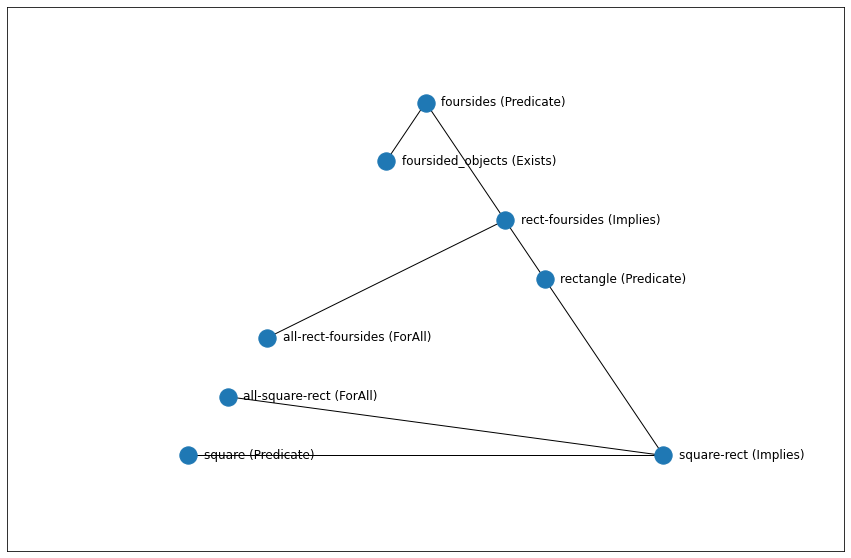

In [168]:
def move(pos, x_shift, y_shift):
    return {n: (x + x_shift, y + y_shift) for n, (x, y) in pos.items()}


fig = plt.figure(1, figsize=(15, 10))
plt.margins(0.3, 0.2, tight=True)
pos = nx.planar_layout(model.graph)
nx.draw_networkx_nodes(model.graph, pos=pos)
nx.draw_networkx_edges(model.graph, pos=pos, arrows=False)
pos_moved = move(pos, 0.06, 0)
labels = {n: f"{str(n)} ({n.__class__.__name__})" for n in model.graph}

nx.draw_networkx_labels(
    model.graph, labels=labels, pos=pos_moved, horizontalalignment="left"
)

plt.show()
